# Gráfico com dados do World Bank


# Tomáz Versolato Carballo | RM: 551417

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import requests
import io

url = 'https://databank.worldbank.org/data/download/WDI_csv.zip'

response = requests.get(url)
zip_file = ZipFile(io.BytesIO(response.content))

zip_file.namelist()

with zip_file.open('WDIData.csv') as file:
    df = pd.read_csv(file)

life_expectancy = df[df['Indicator Name'] == 'Life expectancy at birth, total (years)']

life_expectancy = life_expectancy[['Country Name', 'Country Code', '2008', '2009', '2010',
                                   '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']]

life_expectancy.dropna(inplace=True)

life_expectancy.head()


,Country Name,Country Code,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
710,Africa Eastern and Southern,AFE,56.680419,57.620852,58.411150,59.293271,60.050780,60.709870,61.337917,61.856458,62.444050,62.922390,63.365863
2196,Africa Western and Central,AFW,53.641165,54.159421,54.550169,55.013138,55.340561,55.673406,55.922229,56.195872,56.581678,56.888446,57.189139
3682,Arab World,ARB,69.286427,69.812638,70.041254,70.261520,70.180461,70.196514,70.492629,70.758222,70.943062,71.429596,71.633017
5168,Caribbean small states,CSS,71.177469,71.831907,72.018689,72.358461,72.640703,72.720908,72.680877,72.610264,72.560522,72.600895,72.583687
6654,Central Europe and the Baltics,CEB,74.575953,74.930364,75.293966,75.888475,75.993489,76.355163,76.675624,76.571878,76.969811,76.947443,76.976823


# Gráfico de linha


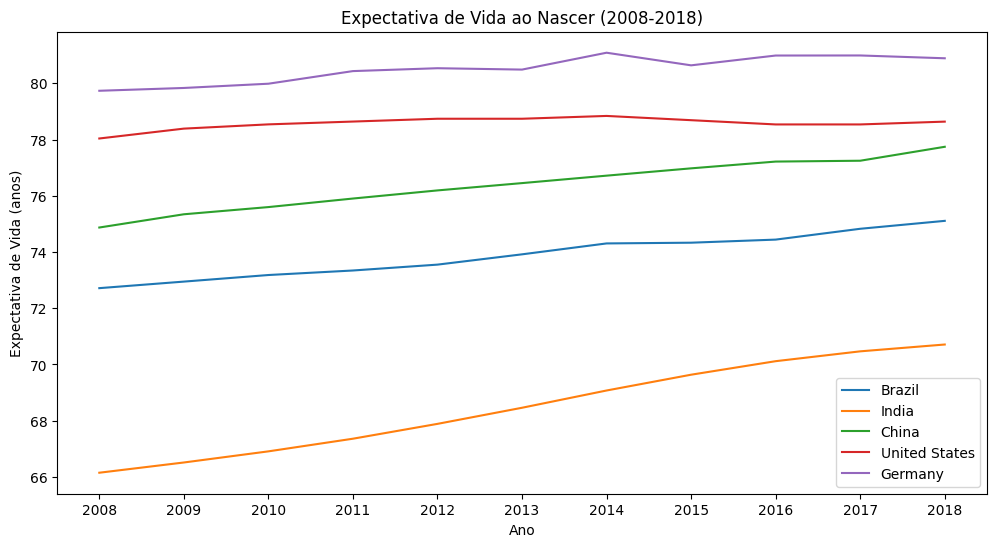

In [19]:
# Selecionar alguns países para o gráfico de linha
countries = ['Brazil', 'India', 'China', 'United States', 'Germany']
df_line = life_expectancy[life_expectancy['Country Name'].isin(countries)]

# Transpor o DataFrame para facilitar o plot
df_line = df_line.set_index('Country Name').transpose()

# Remover a coluna 'Country Code' se estiver presente
if 'Country Code' in df_line.index:
    df_line = df_line.drop('Country Code')

# Plotar o gráfico de linha
plt.figure(figsize=(12, 6))
for country in countries:
    plt.plot(df_line.index, df_line[country], label=country)

plt.title('Expectativa de Vida ao Nascer (2008-2018)')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida (anos)')
plt.legend()
plt.show()


# Gráfico de barra


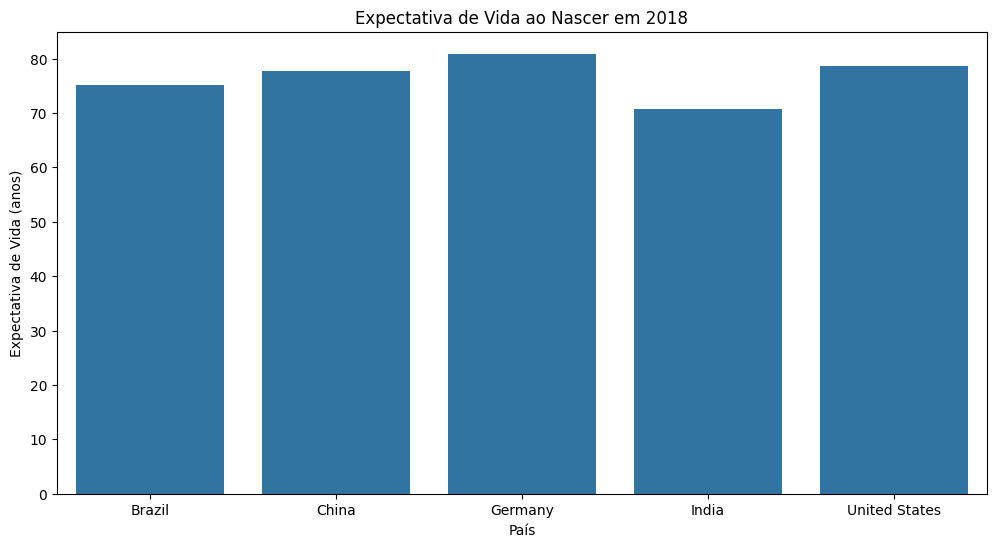

In [20]:
# Gráfico de Barra para o ano de 2018
plt.figure(figsize=(12, 6))
sns.barplot(x='Country Name', y='2018', data=life_expectancy[life_expectancy['Country Name'].isin(countries)])
plt.title('Expectativa de Vida ao Nascer em 2018')
plt.xlabel('País')
plt.ylabel('Expectativa de Vida (anos)')
plt.show()


# Histograma


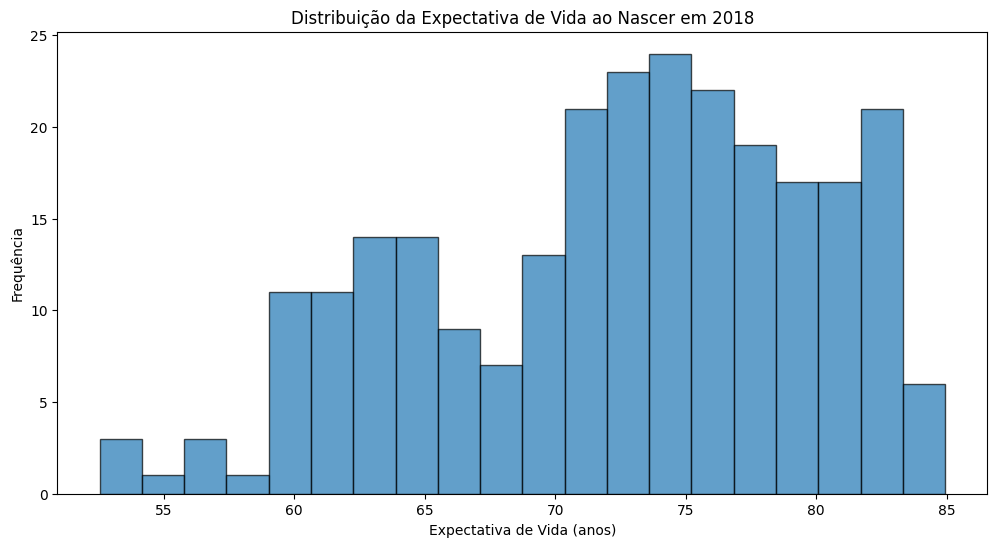

In [21]:
# Histograma para o ano de 2018
plt.figure(figsize=(12, 6))
plt.hist(life_expectancy['2018'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribuição da Expectativa de Vida ao Nascer em 2018')
plt.xlabel('Expectativa de Vida (anos)')
plt.ylabel('Frequência')
plt.show()


# Gráfico de pizza


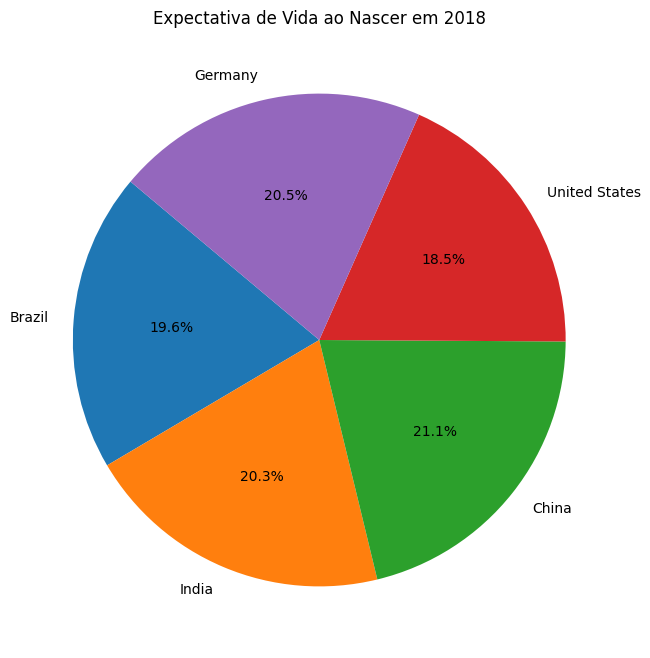

In [22]:
# Gráfico de Pizza para o ano de 2018
plt.figure(figsize=(8, 8))
plt.pie(life_expectancy[life_expectancy['Country Name'].isin(countries)]['2018'],
        labels=countries, autopct='%1.1f%%', startangle=140)
plt.title('Expectativa de Vida ao Nascer em 2018')
plt.show()


# Scatter plot

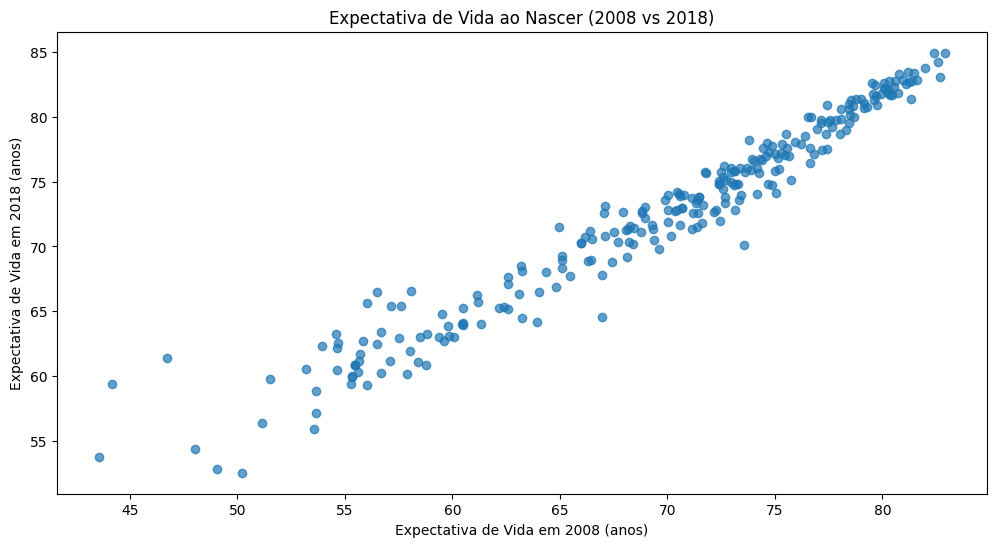

In [23]:
# Scatter Plot entre 2008 e 2018
plt.figure(figsize=(12, 6))
plt.scatter(life_expectancy['2008'], life_expectancy['2018'], alpha=0.7)
plt.title('Expectativa de Vida ao Nascer (2008 vs 2018)')
plt.xlabel('Expectativa de Vida em 2008 (anos)')
plt.ylabel('Expectativa de Vida em 2018 (anos)')
plt.show()
